In [6]:
import os
import pandas as pd
folder_path = r"C:\Users\Ayushi mishra\Downloads\archive (3)"
files_in_folder = os.listdir(folder_path)
csv_files = [f for f in files_in_folder if f.endswith('.csv')]

if csv_files:
    filename = csv_files[0]
    full_path = os.path.join(folder_path, filename)
    
    print(f" Found the file: {filename}")
    print("Loading data now")
    df = pd.read_csv(full_path)
    
    print("\n Success! Data Preview")
    print(df.head())
    print("\nColumns:", df.columns)
    
else:
    print(" No CSV file found in this folder.")
    print("Files found:", files_in_folder)

 Found the file: Test.csv
Loading data now

 Success! Data Preview
                                                text  label
0  I always wrote this series off as being a comp...      0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2  This movie was so poorly written and directed ...      0
3  The most interesting thing about Miryang (Secr...      1
4  when i first read about "berlin am meer" i did...      0

Columns: Index(['text', 'label'], dtype='object')


In [7]:
print("Shape of dataset:", df.shape)
print("\nSentiment Counts:")
print(df['label'].value_counts())

Shape of dataset: (5000, 2)

Sentiment Counts:
label
1    2505
0    2495
Name: count, dtype: int64


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ayushi
[nltk_data]     mishra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not') 

def clean_text(text):
    text = re.sub('<.*?>', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    cleaned_words = [ps.stem(word) for word in words if not word in all_stopwords]
    return ' '.join(cleaned_words)

print("Cleaning data")

df['clean_text'] = df['text'].apply(clean_text)

print("\n Cleaning Complete! ")
print(df[['text', 'clean_text']].head())

Cleaning data

--- Cleaning Complete! ---
                                                text  \
0  I always wrote this series off as being a comp...   
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...   
2  This movie was so poorly written and directed ...   
3  The most interesting thing about Miryang (Secr...   
4  when i first read about "berlin am meer" i did...   

                                          clean_text  
0  alway wrote seri complet stink fest jim belush...  
1  st watch dir steve purcel typic mari kate ashl...  
2  movi poorli written direct fell asleep minut m...  
3  interest thing miryang secret sunshin actor je...  
4  first read berlin meer expect much thought rig...  


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

cv = TfidfVectorizer(max_features=1500)
X = cv.fit_transform(df['clean_text']).toarray()
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f" Model Accuracy: {accuracy * 100:.2f}%")

def predict_sentiment(sample_review):
    sample_review = clean_text(sample_review)
    sample_vector = cv.transform([sample_review]).toarray()
    prediction = model.predict(sample_vector)
    return "POSITIVE" if prediction[0] == 1 else "NEGATIVE"

Training the model... (this takes a moment)
 Model Accuracy: 84.60%


In [15]:
new_reviews = [
    "The movie was fantastic! I loved every moment.",          
    "Total waste of time. I want my money back.",               
    "It was okay, not the best but watchable.",                 
    "The acting was great but the script was terrible.",        
    "I fell asleep after 20 minutes.",                         
    "I would not recommend this to my worst enemy."             
]
for review in new_reviews:
    clean_review = clean_text(review)
    review_vector = cv.transform([clean_review]).toarray()
    prediction = model.predict(review_vector)
    sentiment = "POSITIVE" if prediction[0] == 1 else "NEGATIVE "
    print(f"Review: '{review}'")
    print(f"Predicted: {sentiment}")

Review: 'The movie was fantastic! I loved every moment.'
Predicted: POSITIVE
Review: 'Total waste of time. I want my money back.'
Predicted: NEGATIVE 
Review: 'It was okay, not the best but watchable.'
Predicted: POSITIVE
Review: 'The acting was great but the script was terrible.'
Predicted: NEGATIVE 
Review: 'I fell asleep after 20 minutes.'
Predicted: NEGATIVE 
Review: 'I would not recommend this to my worst enemy.'
Predicted: NEGATIVE 


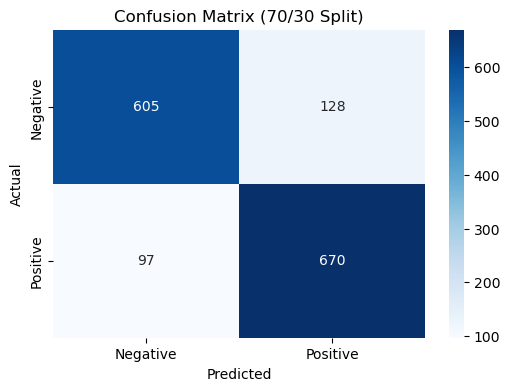

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (70/30 Split)')
plt.show()

In [17]:
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(cv, 'tfidf_vectorizer.pkl')

print("Success! Model saved to your folder.")

Success! Model saved to your folder.
